In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_excel('D:\HPV\Dataframe.xlsx')
df.head()

,ID,hsa-miR-1260b,hsa-miR-133b,hsa-miR-206,hsa-miR-1-3p,hsa-miR-193b-3p,hsa-miR-199a-5p,hsa-miR-214-3p,hsa-miR-199a-3p,hsa-miR-145-5p,...,hsa-miR-492,hsa-miR-4763-5p,hsa-let-7d-3p,hsa-miR-4695-3p,hsa-miR-1910-5p,hsa-miR-7109-3p,hsa-miR-6756-3p,hsa-miR-3607-3p,hsa-miR-3940-3p,Sample Type
0,GSM5336332,2.548133,1.098450,1.246871,1.092946,1.720067,1.479086,1.211074,1.816975,1.815994,...,1.214085,1.210756,1.166605,1.152183,1.162823,1.150363,1.261408,1.157331,1.188048,HPV-Negative
1,GSM5336333,2.181895,1.251169,1.220861,1.209613,1.359728,1.899922,1.508760,2.335684,1.862208,...,1.164750,1.357987,1.364843,1.300817,1.298505,1.324946,1.389358,1.155804,1.337466,HPV-Negative
2,GSM5336334,2.468839,1.272448,1.269500,1.158833,1.550637,1.752822,1.371910,2.172212,1.671492,...,1.225104,1.151816,1.134260,1.131825,1.147602,1.122087,1.247032,1.138050,1.156478,HPV-Negative
3,GSM5336335,2.797465,1.388375,1.217574,1.258723,2.007589,2.041583,1.602843,2.448436,2.192906,...,1.278309,1.134635,1.136358,1.113786,1.132249,1.105676,1.235492,1.264178,1.155558,HPV-Negative
4,GSM5336336,2.620180,1.255865,1.255578,1.220424,1.815533,1.988549,1.515600,2.379178,2.310249,...,1.180319,1.169164,1.143937,1.146391,1.151272,1.165698,1.243880,1.310194,1.164260,HPV-Negative


In [3]:
df = df.drop('ID', axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
unique, counts= np.unique(y, return_counts=True)
dict(zip(unique,counts))

{0: 166, 1: 63}

<AxesSubplot: ylabel='count'>

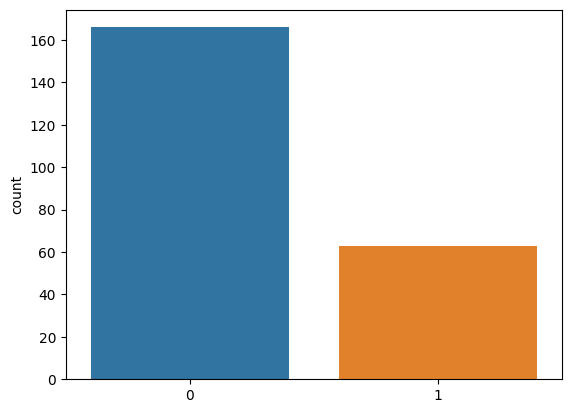

In [6]:
sns.countplot(x=y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [9]:
X_val

array([[ 0.18137803, -0.07212997,  0.09140423, ..., -0.71948032,
        -0.61597468, -0.9343756 ],
       [-1.35746103, -0.4993571 , -0.62741875, ..., -1.51495572,
        -0.22292477, -0.77088955],
       [-0.46282171,  2.32503648,  2.40046563, ..., -0.18985219,
        -0.7907129 , -0.35042209],
       ...,
       [-0.82835052,  0.35521652,  0.97353106, ..., -0.61060611,
        -0.2587198 , -0.65465056],
       [-0.37922741,  0.85870863,  0.3850211 , ...,  1.64742724,
        -0.95286506,  1.79064313],
       [-1.27659061, -0.89904618, -0.43349634, ..., -0.6571741 ,
         1.16511433, -0.6465891 ]])

SVM

In [10]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [11]:
y_pred_val_svm = svm.predict(X_val)

In [12]:
accuracy_val_svm = accuracy_score(y_val, y_pred_val_svm)
print("Validation Accuracy:", accuracy_val_svm)

Validation Accuracy: 0.782608695652174


In [13]:
y_pred_test_svm = svm.predict(X_test)

In [14]:
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Test Accuracy:", accuracy_test_svm)

Test Accuracy: 0.8260869565217391


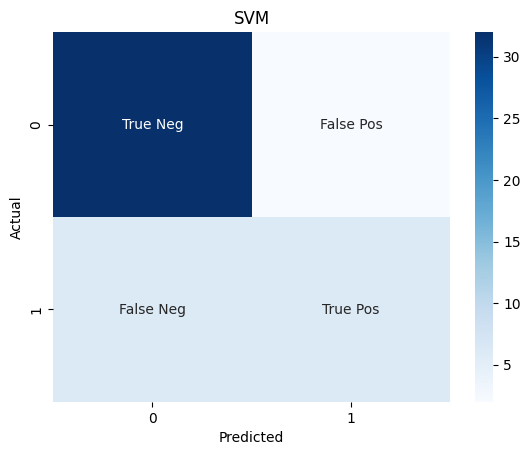

In [69]:
cm = confusion_matrix(y_test, y_pred_test_svm)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
plt.title("SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
report = classification_report(y_test, y_pred_test_svm)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.75      0.50      0.60        12

    accuracy                           0.83        46
   macro avg       0.80      0.72      0.74        46
weighted avg       0.82      0.83      0.81        46



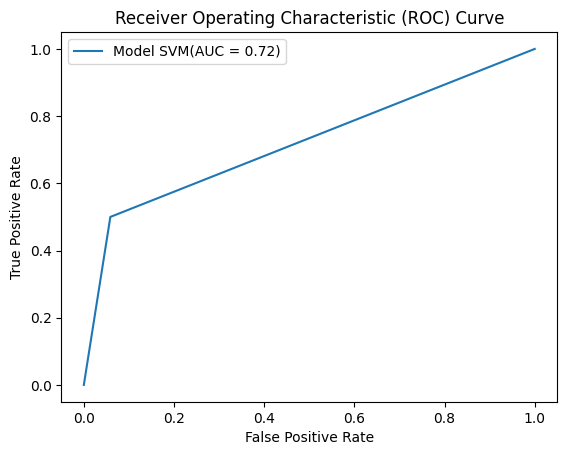

In [18]:
auc_model_svm = roc_auc_score(y_test, y_pred_test_svm)

false_positive_rate_svm, true_positive_rate_svm, _ = roc_curve(y_test, y_pred_test_svm)

plt.plot(false_positive_rate_svm, true_positive_rate_svm, label='Model SVM(AUC = {:.2f})'.format(auc_model_svm))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Random Forest 

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred_val_rf = rf.predict(X_val)

In [21]:
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print("Validation Accuracy:", accuracy_val_rf)

Validation Accuracy: 0.7608695652173914


In [22]:
y_pred_test_rf = rf.predict(X_test)

In [23]:
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("Test Accuracy:", accuracy_test_rf)

Test Accuracy: 0.8043478260869565


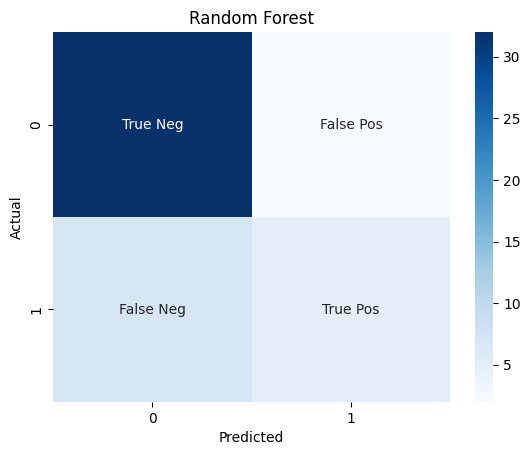

In [27]:
cm = confusion_matrix(y_test, y_pred_test_rf)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
plt.title("Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
report = classification_report(y_test, y_pred_test_rf)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        34
           1       0.71      0.42      0.53        12

    accuracy                           0.80        46
   macro avg       0.77      0.68      0.70        46
weighted avg       0.79      0.80      0.79        46



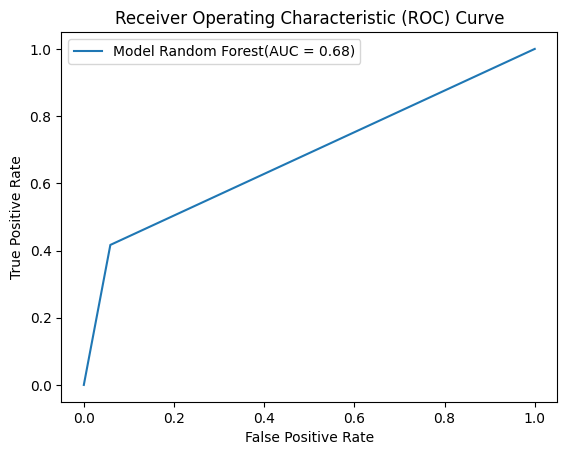

In [29]:
auc_model_rf = roc_auc_score(y_test, y_pred_test_rf)

false_positive_rate_rf, true_positive_rate_rf, _ = roc_curve(y_test, y_pred_test_rf)

plt.plot(false_positive_rate_rf, true_positive_rate_rf, label='Model Random Forest(AUC = {:.2f})'.format(auc_model_rf))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

XGBoost

In [30]:
import xgboost as xgb

In [31]:
xgbm = xgb.XGBClassifier()
xgbm.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [32]:
y_pred_val_xgbm= xgbm.predict(X_val)

In [33]:
accuracy_val_xgbm= accuracy_score(y_val, y_pred_val_xgbm)
print("Validation Accuracy:", accuracy_val_xgbm)

Validation Accuracy: 0.8043478260869565


In [34]:
y_pred_test_xgbm = xgbm.predict(X_test)

In [35]:
accuracy_test_xgbm = accuracy_score(y_test, y_pred_test_xgbm)
print("Test Accuracy:", accuracy_test_xgbm)

Test Accuracy: 0.7608695652173914


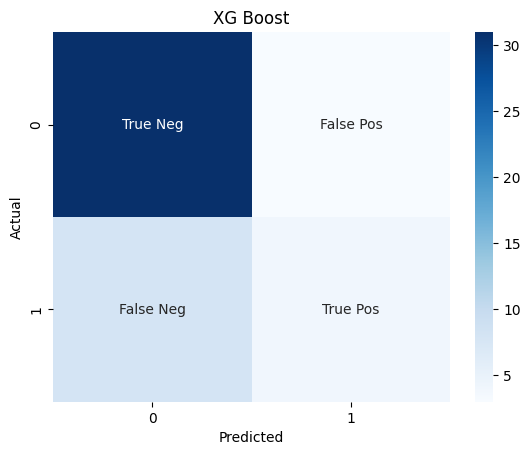

In [36]:
cm = confusion_matrix(y_test, y_pred_test_xgbm)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
plt.title("XG Boost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [37]:
report = classification_report(y_test, y_pred_test_xgbm)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        34
           1       0.57      0.33      0.42        12

    accuracy                           0.76        46
   macro avg       0.68      0.62      0.64        46
weighted avg       0.74      0.76      0.74        46



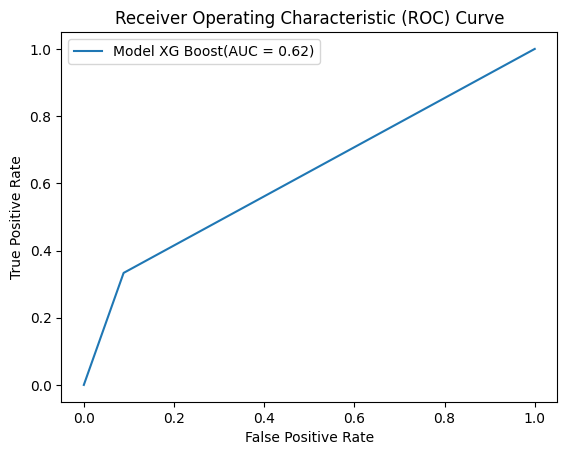

In [38]:
auc_model_xgbm= roc_auc_score(y_test, y_pred_test_xgbm)

false_positive_rate_xgbm, true_positive_rate_xgbm, _ = roc_curve(y_test, y_pred_test_xgbm)

plt.plot(false_positive_rate_xgbm, true_positive_rate_xgbm, label='Model XG Boost(AUC = {:.2f})'.format(auc_model_xgbm))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred_val_lr= lr.predict(X_val)

In [42]:
accuracy_val_lr= accuracy_score(y_val, y_pred_val_lr)
print("Validation Accuracy:", accuracy_val_lr)

Validation Accuracy: 0.8043478260869565


In [43]:
y_pred_test_lr = lr.predict(X_test)

In [44]:
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
print("Test Accuracy:", accuracy_test_lr)

Test Accuracy: 0.7608695652173914


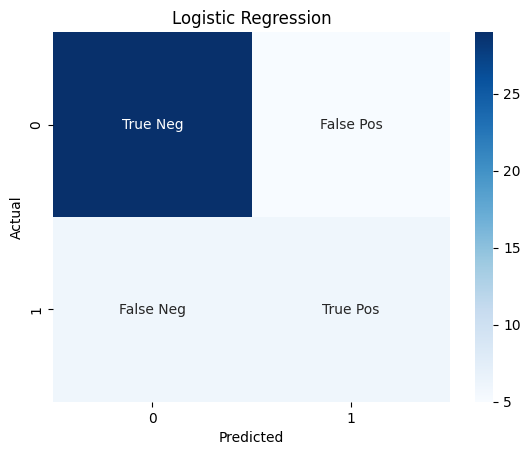

In [45]:
cm = confusion_matrix(y_test, y_pred_test_lr)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
plt.title("Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [46]:
report = classification_report(y_test, y_pred_test_lr)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.55      0.50      0.52        12

    accuracy                           0.76        46
   macro avg       0.69      0.68      0.68        46
weighted avg       0.75      0.76      0.76        46



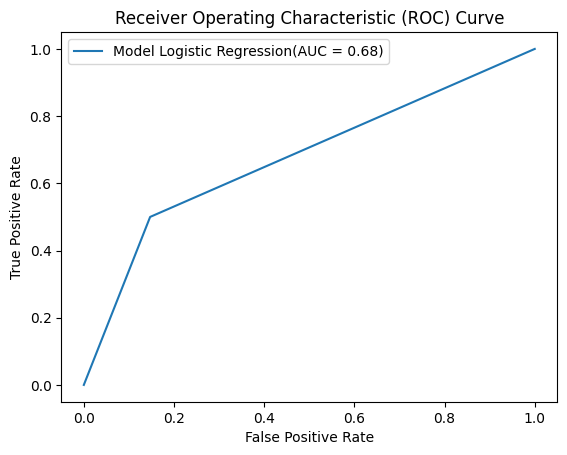

In [47]:
auc_model_lr= roc_auc_score(y_test, y_pred_test_lr)

false_positive_rate_lr, true_positive_rate_lr, _ = roc_curve(y_test, y_pred_test_lr)

plt.plot(false_positive_rate_lr, true_positive_rate_lr, label='Model Logistic Regression(AUC = {:.2f})'.format(auc_model_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

K Nearest Neighbour

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred_val_knn = knn.predict(X_val)

In [51]:
accuracy_val_knn= accuracy_score(y_val, y_pred_val_knn)
print("Validation Accuracy:", accuracy_val_knn)

Validation Accuracy: 0.7391304347826086


In [52]:
y_pred_test_knn = lr.predict(X_test)

In [53]:
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
print("Test Accuracy:", accuracy_test_knn)

Test Accuracy: 0.7608695652173914


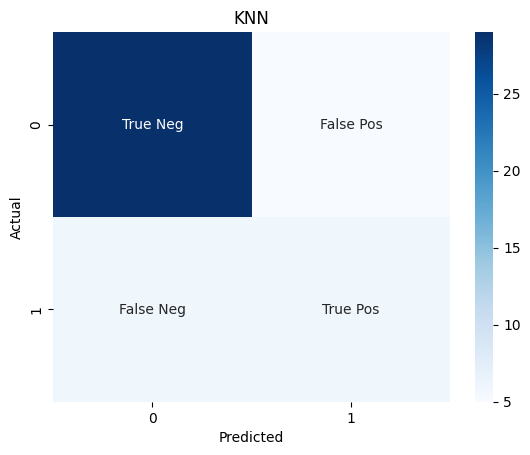

In [68]:
cm = confusion_matrix(y_test, y_pred_test_knn)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
plt.title("KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [55]:
report = classification_report(y_test, y_pred_test_knn)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.55      0.50      0.52        12

    accuracy                           0.76        46
   macro avg       0.69      0.68      0.68        46
weighted avg       0.75      0.76      0.76        46



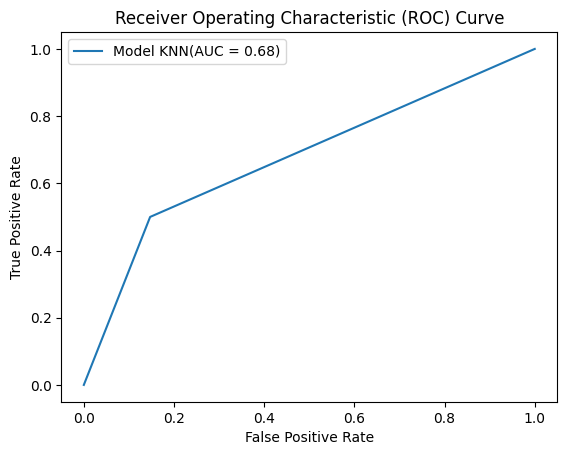

In [56]:
auc_model_knn= roc_auc_score(y_test, y_pred_test_knn)

false_positive_rate_knn, true_positive_rate_knn, _ = roc_curve(y_test, y_pred_test_knn)

plt.plot(false_positive_rate_knn, true_positive_rate_knn, label='Model KNN(AUC = {:.2f})'.format(auc_model_knn))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Multi-Layer Perceptron

In [57]:
from sklearn.neural_network import MLPClassifier

In [58]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50,25), activation='relu', random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), random_state=42)

In [59]:
y_pred_val_mlp = mlp.predict(X_val)

In [60]:
accuracy_val_mlp= accuracy_score(y_val, y_pred_val_mlp)
print("Validation Accuracy:", accuracy_val_mlp)

Validation Accuracy: 0.7608695652173914


In [61]:
y_pred_test_mlp = mlp.predict(X_test)

In [62]:
accuracy_test_mlp = accuracy_score(y_test, y_pred_test_mlp)
print("Test Accuracy:", accuracy_test_mlp)

Test Accuracy: 0.8478260869565217


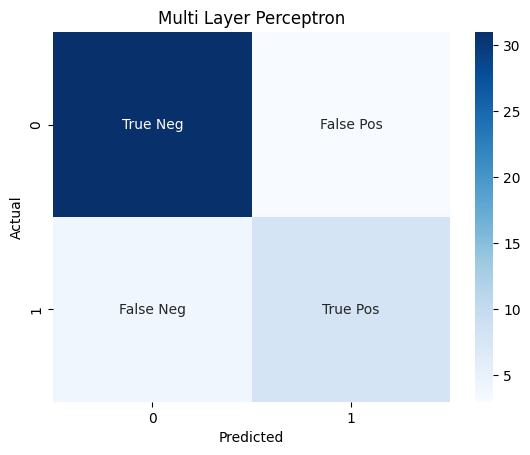

In [63]:
cm = confusion_matrix(y_test, y_pred_test_mlp)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
plt.title("Multi Layer Perceptron")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [64]:
report = classification_report(y_test, y_pred_test_mlp)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.73      0.67      0.70        12

    accuracy                           0.85        46
   macro avg       0.81      0.79      0.80        46
weighted avg       0.84      0.85      0.85        46



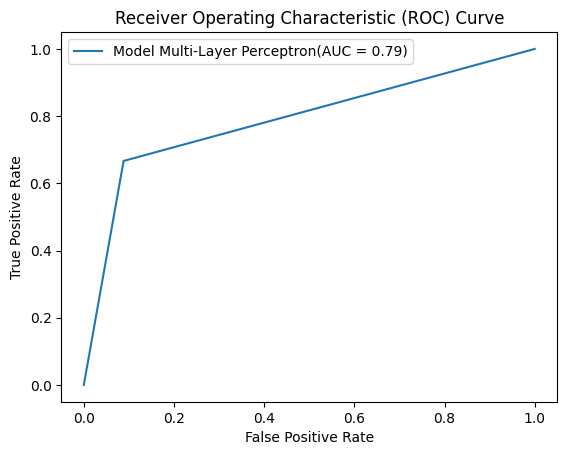

In [65]:
auc_model_mlp= roc_auc_score(y_test, y_pred_test_mlp)

false_positive_rate_mlp, true_positive_rate_mlp, _ = roc_curve(y_test, y_pred_test_mlp)

plt.plot(false_positive_rate_mlp, true_positive_rate_mlp, label='Model Multi-Layer Perceptron(AUC = {:.2f})'.format(auc_model_mlp))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

K-Means Clustering

In [66]:
from sklearn.cluster import KMeans

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
k = 2  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_

print("Cluster Labels:", cluster_labels)

Cluster Labels: [1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 0 0 1 0 1 1]


In [65]:
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]

for metric in clustering_metrics:
    score = metric(y, cluster_labels)
    print(f"{metric.__name__}: {score}")

homogeneity_score: 0.011936502477323686
completeness_score: 0.01045032769635139
v_measure_score: 0.011144084398605593
adjusted_rand_score: 0.0270631139357267
adjusted_mutual_info_score: 0.007673054539161152


Principal Component Analysis

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca= PCA(n_components=None)
pca_result= pca.fit_transform(X_scaled)

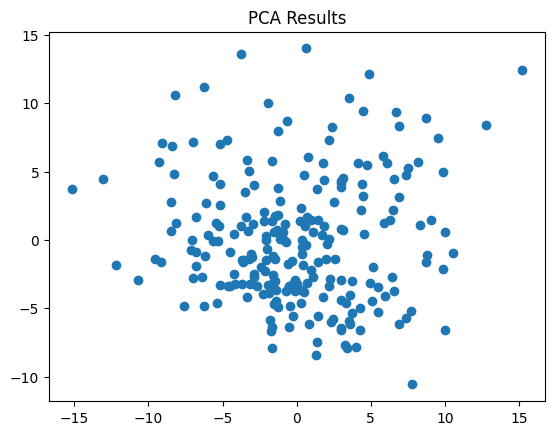

In [71]:
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Results')
plt.show()

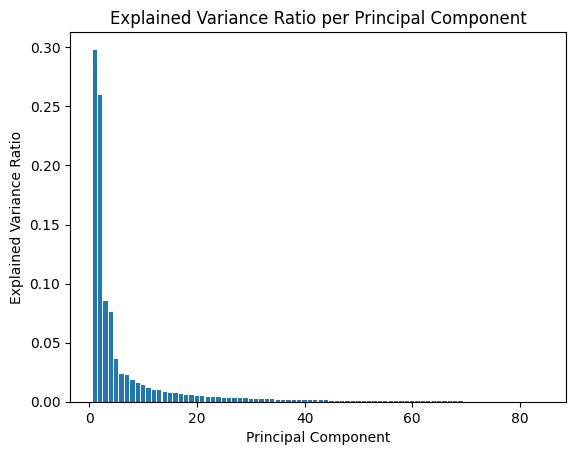

In [72]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()

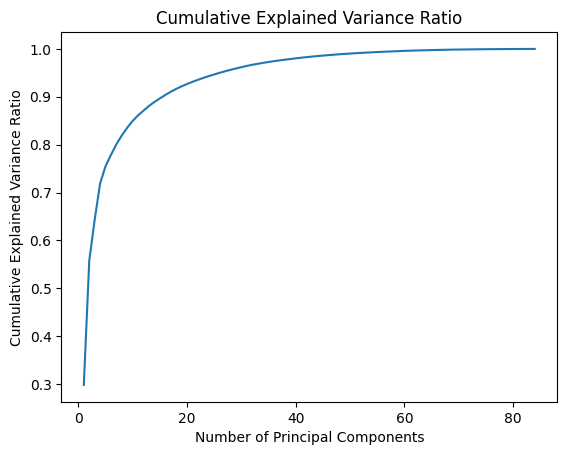

In [73]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.show()